### Learning Representations by Propagating Errors (Backprop)

#### Convincing myself of the delta rule for gradient descent
$\delta_{p}w_{ji} = \eta(t_{pj}-o_{pj})i_{pi}$

Where p is the pattern or the combination of input x's and output y,

$\eta$ is the learning rate

$t_{pj}$ is the target of the j'th output for pattern p

$o_{pj}$ is our prediction of the j'th output for pattern p

$i_{pi}$ is the value of the ith element in the input for pattern p

Imagine we're trying to learn AND

|x1 | x2 | y |
|-|-|-|
|0|0|0|
|0|1|0|
|1|1|1|

This is linearly seperable, so the network should be able to learn it. Let's initialize a simple network with one node and work through it by hand. It's a bit tedious to do this in latex / charts so I'll just put this image here.

The delta rule does work and makes sense to me.

In [57]:
# Now let's try to write some code from scratch that allows us to construct these types of networks.
# Note: this code isn't very good or safe, it's just to understand how it works / learns
import random

# network = Network(fan_in, fan_out)
# network.forward(x)
# network.update(x, y, learning_rate)

class Network:
    # need to store fan_in x fan_out connections
    connections = {}
    fan_in = 0
    fan_out = 0
    
    def __init__(self, fan_in, fan_out):
        for x in range(fan_in):
            for y in range(fan_out):
                self.connections[(x,y)] = random.random()
        self.fan_in = fan_in
        self.fan_out = fan_out

    def threshold(self, val):
        if val <= 0.5:
            return 0
        return 1
                
    def forward(self, input):
        out = [0 for i in range(self.fan_out)]
        for y in range(self.fan_out):
            for x in range(self.fan_in):
                out[y] += input[x] * self.connections.get((x, y))
        out = [self.threshold(val) for val in out]
        return out

    def update(self, input, target, learning_rate=0.01):
        # this is where we apply the generalized delta rule for each connection
        forward_pass_vals = self.forward(input)

        for y in range(self.fan_out):
            for x in range(self.fan_in):
                difference = target[y] - forward_pass_vals[y]
                delta = learning_rate * difference * input[x]
                # print(difference)
                self.connections[(x,y)] = self.connections.get((x,y)) + delta

In [71]:
from IPython.display import display, HTML

# Now let's test if we can learn AND
network = Network(2, 1)
# "training data"
data = [([0,0],0), ([0,1],0), ([1,0],0), ([1,1],1)]

# Before training
print("Before Training")
for example in data:
    output = network.forward(example[0])[0]
    correct = abs(output - example[1]) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f'Input {example[0]}, should be {example[1]}. Got: {output:.2f} --> {status}')

# now let's "train" 100 times
for i in range(100):
    for example in data:
        network.update(example[0], [example[1]])

# After training
print("\nAfter Training")
for example in data:
    output = network.forward(example[0])[0]
    correct = abs(output - example[1]) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f'Input {example[0]}, should be {example[1]}. Got: {output:.2f} --> {status}')


Before Training
Input [0, 0], should be 0. Got: 0.00 --> CORRECT
Input [0, 1], should be 0. Got: 1.00 --> WRONG
Input [1, 0], should be 0. Got: 0.00 --> CORRECT
Input [1, 1], should be 1. Got: 1.00 --> CORRECT

After Training
Input [0, 0], should be 0. Got: 0.00 --> CORRECT
Input [0, 1], should be 0. Got: 0.00 --> CORRECT
Input [1, 0], should be 0. Got: 0.00 --> CORRECT
Input [1, 1], should be 1. Got: 1.00 --> CORRECT


In [72]:
# Now let's test if we can learn OR
network = Network(2, 1)
# "training data"
data = [([0,0],0), ([0,1],1), ([1,0],1), ([1,1],1)]

# Before training
print("Before Training")
for example in data:
    output = network.forward(example[0])[0]
    correct = abs(output - example[1]) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f'Input {example[0]}, should be {example[1]}. Got: {output:.2f} --> {status}')

# now let's "train" 100 times
for i in range(100):
    for example in data:
        network.update(example[0], [example[1]])

# After training
print("\nAfter Training")
for example in data:
    output = network.forward(example[0])[0]
    correct = abs(output - example[1]) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f'Input {example[0]}, should be {example[1]}. Got: {output:.2f} --> {status}')


Before Training
Input [0, 0], should be 0. Got: 0.00 --> CORRECT
Input [0, 1], should be 1. Got: 1.00 --> CORRECT
Input [1, 0], should be 1. Got: 0.00 --> WRONG
Input [1, 1], should be 1. Got: 1.00 --> CORRECT

After Training
Input [0, 0], should be 0. Got: 0.00 --> CORRECT
Input [0, 1], should be 1. Got: 1.00 --> CORRECT
Input [1, 0], should be 1. Got: 1.00 --> CORRECT
Input [1, 1], should be 1. Got: 1.00 --> CORRECT


Cool so we can learn AND and OR, but the paper says, and it makes sense that we cannot learn XOR as it is not linearly seperable. So let's see what happens if we try to do that.

In [85]:
# Now let's test if we can learn XOR
network = Network(2, 1)
data = [([0,0],0), ([0,1],1), ([1,0],1), ([1,1],0)]

# Before training
print("Before Training")
for example in data:
    output = network.forward(example[0])[0]
    correct = abs(output - example[1]) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f'Input {example[0]}, should be {example[1]}. Got: {output:.2f} --> {status}')

for i in range(100):
    for example in data:
        network.update(example[0], [example[1]])
# After training
print("\nAfter Training")
for example in data:
    output = network.forward(example[0])[0]
    correct = abs(output - example[1]) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f'Input {example[0]}, should be {example[1]}. Got: {output:.2f} --> {status}')


Before Training
Input [0, 0], should be 0. Got: 0.00 --> CORRECT
Input [0, 1], should be 1. Got: 0.00 --> WRONG
Input [1, 0], should be 1. Got: 1.00 --> CORRECT
Input [1, 1], should be 0. Got: 1.00 --> WRONG

After Training
Input [0, 0], should be 0. Got: 0.00 --> CORRECT
Input [0, 1], should be 1. Got: 0.00 --> WRONG
Input [1, 0], should be 1. Got: 0.00 --> WRONG
Input [1, 1], should be 0. Got: 1.00 --> WRONG


No matter how many times I run it, it will not learn. In the paper it mentions that with a single extra bit the network is able to learn.

In [101]:
# Now let's test if we can learn XOR with an extra bit
network = Network(3, 1)
data = [([0,0,0],0), ([0,1,0],1), ([1,0,0],1), ([1,1,1],0)]

# Before training
print("Before Training")
for example in data:
    output = network.forward(example[0])[0]
    correct = abs(output - example[1]) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f'Input {example[0]}, should be {example[1]}. Got: {output:.2f} --> {status}')

# now let's "train" 100 times
for i in range(1000):
    for example in data:
        network.update(example[0], [example[1]])

# After training
print("\nAfter Training")
for example in data:
    output = network.forward(example[0])[0]
    correct = abs(output - example[1]) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f'Input {example[0]}, should be {example[1]}. Got: {output:.2f} --> {status}')


Before Training
Input [0, 0, 0], should be 0. Got: 0.00 --> CORRECT
Input [0, 1, 0], should be 1. Got: 0.00 --> WRONG
Input [1, 0, 0], should be 1. Got: 1.00 --> CORRECT
Input [1, 1, 1], should be 0. Got: 1.00 --> WRONG

After Training
Input [0, 0, 0], should be 0. Got: 0.00 --> CORRECT
Input [0, 1, 0], should be 1. Got: 1.00 --> CORRECT
Input [1, 0, 0], should be 1. Got: 1.00 --> CORRECT
Input [1, 1, 1], should be 0. Got: 0.00 --> CORRECT


Interesting, as the paper confirms it now "learns" the pattern. 

## Now let's see the derivation that proves that this rule is a gradient descent on the error

If we specify the error metric for a single example as

$\frac{1}{2}\sum(t_{pj}-o_{pj})^2$

Then we want to show that the derivative of this is proportional to to the change specified in the rule above. (with the correct sign as well)

To do this we can just do a bit of calculus with the chain rule. To do this we will show that the -derivative of the error with respect to the weight i for unit j is equal to:

$\delta_{p}i_{pi}$

Where the delta term is simply the target y for unit j - our predicted y hat for unit j

If we, for simplicities sake just imagine there's only one output and one input i

$E_{p} = \frac{1}{2}(y - (w * i))^2$

Then if we apply the chain rule we get the derivative as

$-(y-(w*i)) * i$

Which if we're trying to minimize, we multiply by -1, giving us the term from rule from above!

$i(y-\hat y)$

Now if we take a "step" in that direction, as given by the learning rate then we will minimize the error.

However we did simplify here and assume there's only one input i and one output j for the math.

Now what we can do however is observe that because the error metric is the summation of the errors on all the examples, we know the calculus sum rule means you can just add the derivatives together. So sum up the derivatives for the error with respect to each of the weights for all patterns and that gives us our overall gradient for the weight across the entire set. The interesting thing is that the authors note that if you update the weights after each pattern it's not a true gradient descent on E. I believe however the modern way is to compute the gradients for the entire input batch and sum the gradients together meaning it is a true descent on E.

With no hidden units, this is a convex function, so it will always find the global minimum.

Now we get to the real meat and potatoes of this paper. Their contribution is to show two things when applying this gradient descent algorithm in networks with hidden units.
1. There is an efficient way to compute the derivatives for weights / biases anywhere in the network.
2. The problem of getting stuck in a local minima (and not getting to the global minimum) doesn't really matter.

To begin with we consider layered feedforward networks (the normal type essentially).

We know that networks with hidden layers without any non-linear activations collapse into one large linear network we add nonlinear activation functions. These non linear activation functions that we add is an increasing and differentiable function that we feed the net output of a unit to (net output just means we perform the normal input vector @ weights).

So maybe something like tanh(layer - 1's output @ unit j's weights).

Now we do the derivation. The change in any of the weights in any place in the network needs to be proportional to the -derivative of the error with respect to that weight.

How do we derive the derivative of the error with respect to a given weight? Well we know that between the error and the weight we feed it to that "net" function, which is just one term in the summation of the multiplication of the previous layers i'th output with this units i'th weight. (ignoring the activation function for now).

Again then we apply the chain rule here to multiply the derivative of the error with respect to the output of that net function with the derivative of the net function with respect to a given weight.

To get the derivative of the net function with respect to a given weight we know that there's only one term in the summation that has that given weight as a term, and it's a simple multiply with the i'th output from the layer before / the i'th input. Therefore we know that the derivative of the net function with respect to a given weight is just the i'th output from the layer before / the i'th input.

We know that the derivative of the error with respect to the net is equal to that $\delta_{p}i_{pi}$ term. This is because of how we define the error function. The error function is just $\frac{1}{2} \sum (t_{pj}-o_{pj})^2$, but $o_{pj}$ is the output of the net function passed into our non-linearity. Therefore our goal is to figure out what that $\delta$ term should be, as we already know, at every point in our network, what the intput / $o_{pj}$ term is.

There is a simple recursive computation (backprop) which can be implemented to propogate the error signals backwards.

This is the crux of the paper here:

To compute $\delta_{pj}$ (the negative partial derivative of the error with respect to the net output of unit j for pattern p) which we want because once we have that we can quite easily compute the derivative for any weight in unit j using this mega derivative for unit j, we:

Apply the chain rule to write this partial derivative as the product of two factors. We say that this mega derivative for unit j is:

(1) the -partial derivative of error with respect to the output from unit j multiplied by (2) the partial derivative of the output from unit j with respect to the net function passed into our non linearity (the matrix multiply previous layer @ j's weights passed into sigmoid).

First let's calculate (1) There are two cases for a unit j in a network with hidden layers. They are either in the last layer (output unit) or they are not. If they are an output unit then we follow the same logic as we would as before with the delta rule. The first term here is then simply $-(y - \hat y)$ * nonlinearity(net_pj). The derivative of the error with respect to the output from unit j. The second term is, as we mentioned above the partial derivative of the output from unit j with respect to the net function passed into our non linearity. Therefore our second term is the derivative of that non linearity with the output 

Therefore our mega derivative ($\delta_{pj}$)for the j'th output unit is $(y - \hat y) * f'(net_{pj})$. For an output unit our mega derivative is the amount of error multiplied by the output from j.

**Unit j is not an output unit but a hidden layer unit**

Now what happens if unit j is not an output unit? This means that unit j is a hidden unit. That means that the output of this unit will not directly appear in the formula for the error, but we still want to calculate the derivative of the error with respect to this unit (to get the mega gradient j). The output of this unit j will influence the error through all the units k in the next layer that j sends its outputs to. In a fully connected network the output from this unit j will be multiplied by the j'th weight in all units k in the next layer. Therefore we use the chain rule again. For simplicity for now let's assume that we just have a chain of layers with one unit each (so there's no summation or anything).

Remember we are trying to find the mega derivative for unit j which is made of two terms

$\delta_j = -\frac{\partial \text{error}}{\partial \text{output of unit } j \text{ (non\_linearity(input @ weights))}} \cdot \frac{\partial \text{output of unit } j \text{ (non\_linearity(input @ weights))}}{\partial \text{input @ weights}}
$

The mega derivative becomes the overall output of our unit multiplied by the sum of (each of the units in the next layer's mega derivative multiplied by that units weight for our unit). The good news is that we already calculated all the next layer's mega derivatives :)

But why is it this? Well let's think about it for a second. My (from the perspective of a unit who is not at an output layer) value gets consumed and is one tiny part in all of those lucky output units who get to influence the error directly. Yet to know how much I'm affecting the error I need to know two things. For each of those output units I affect, how are they affecting the error? If they go up / down does the error go up / down? That concept is captured by their mega derivative. The next thing I need to know is for each of those output units I affect, how important am I in terms of their output? That concept is captured by their weightage of my output.

Therefore for me to calculate my own mega derivative (which tells me how the error will change if I change my net input (input @ my weights)), I need to multiply those two concepts together and sum all those derivatives up, to see if I change, how much the error is going to change, multiplied by the derivative of my own non-linear activation function with respect to my net input.

**Let's look at the actual derivation of this now.**

So we need to find the mega derivative

$\delta_{pj} = -\frac{\partial E_p}{\partial \text{net}_{pj}}$

Where the E is the error for pattern p and the net_pj is the single value resulting from input @ weights.

So imagine that we only have one output unit. Then our mega derivative would be the derivative of the error with respect to the output of the unit we feed into multiplied by the derivative of the output of the unit we feed into with respect to our output. That's saying that the error depends on the next unit, and the next unit depends on us. Therefore we can state this as:

$$\frac{\partial E_p}{\partial o_{pj}} =  \frac{\partial E_p}{\partial \text{net}_{pk}} \cdot \frac{\partial \text{net}_{pk}}{\partial o_{pj}} $$

So now let's start replacing and substituting things based on what we know. We know that the second term (figuring out how much the next unit changes based on us) is their weight for us. This is because we influence that equation by being multiplied by that weight and being added in. Therefore if we increase by 1, they will increase by the weight. Good! The first term we already calculated, which is their mega derivative.

Cool so now we have this thing that we just derived :) but remember that $\delta_{pj}$ is that thing we just derived multiplied by 

$\frac{\partial o_{pj}}{\partial \text{net}_{pj}}$

or the derivative of our own output with respect to our net (input @ output). This however is just non_linearity'(input @ output)

So finnally we get the result. To compute the mega derivative of a hidden unit we follow the formula:

$$\delta_{pj} = \left( \sum_{k \in L_{next}} \delta_{pk} w_{kj} \right) \cdot f'_j(\text{net}_{pj})$$

That was very tricky but I feel like it makes sense to me now! :) 

## Now let's try to implement this from scratch!
I'm not going to bother making it super extensible or efficient or anything I just want it to work. :)

In [367]:
# Now let's try to write some code from scratch that allows us to construct these types of networks.
# Note: this code isn't very good or safe, it's just to understand how it works / learns and to test
import random
import numpy as np

# network = Network([fan_in, hidden layer n dims..., fan_out])
# network.forward(x)
# network.update(x, y, learning_rate)

class Unit:
    def __init__(self, fan_in, learning_rate, momentum):
        self.weights = np.random.rand(fan_in) - 0.5
        self.bias = 0.01
        self.inputs = []
        self.output = 0
        self.learning_rate = learning_rate
        self.delta = 0
        self.momentum = momentum
        self.last_update = 0
        
    def forward(self, x):
        self.inputs = np.array(x)
        output = 1 / (1 + np.exp(-(x @ self.weights + self.bias)))
        self.output = output
        return output

    def update_self_last(self, y):
        error_signals = []
        delta = (y - self.output) * self.output * (1 - self.output)
        for i in range(len(self.weights)):
            weight_input = self.inputs[i]
            update = self.learning_rate * delta * weight_input + (self.momentum * self.last_update)
            self.last_update = update
            error_signal = delta * self.weights[i]
            error_signals.append(error_signal)
            self.weights[i] += update

        self.bias += self.learning_rate * delta
        
        return error_signals
        
    def update_self(self, error_signals, unit_number):
        error_signals_out = []
        error_signal_sum = 0

        for i in range(len(error_signals)):
            error_signal_sum += error_signals[i][unit_number]
        delta = error_signal_sum * self.output * (1 - self.output)
        for i in range(len(self.weights)):
            weight_input = self.inputs[i]
            update = self.learning_rate * delta * weight_input + (self.momentum * self.last_update)
            self.last_update = update
            error_signal = delta * self.weights[i]
            error_signals_out.append(error_signal)
            self.weights[i] += update

        self.bias += self.learning_rate * delta

        return error_signals_out
    
class Layer:
    def __init__(self, units, fan_in, learning_rate, momentum):
        self.units = []
        self.learning_rate = learning_rate
        for i in range(units):
            self.units.append(Unit(fan_in, learning_rate, momentum))
    def forward(self, x):
        activations = []
        for unit in self.units:
            activations.append(unit.forward(x))
        return activations
        
    def update_last_layer(self, y):
        error_signals = []
        for i in range(len(self.units)):
            error_signals.append(self.units[i].update_self_last(y[i]))
        return error_signals
        
    def update_self(self, error_signals):
        error_signals_out = []
        for i in range(len(self.units)):
            error_signals_out.append(self.units[i].update_self(error_signals, i))
        return error_signals_out

class Network:
    def __init__(self, layer_specs, input_dimensions, learning_rate, momentum):
        self.layers = []
        self.learning_rate = learning_rate
        for i in range(len(layer_specs)):
            if(i == 0):
                self.layers.append(Layer(layer_specs[i], input_dimensions, learning_rate, momentum))
            else:
                self.layers.append(Layer(layer_specs[i], layer_specs[i-1], learning_rate, momentum))
            
    def forward(self, x):
        for i in range(len(self.layers)):
            x = self.layers[i].forward(x)
        return x
        
    def update(self, x, y):
        self.forward(x)
        error_signals = self.layers[-1].update_last_layer(y)        
        for i in reversed(range(len(self.layers) - 1)):
            error_signals = self.layers[i].update_self(error_signals)

def calculate_error_single_classification(network, data):
    acc = 0
    for x,y in data:
        prediction = network.forward(x)[0]
        acc += (y - prediction) ** 2
    return acc * 0.5


In [368]:
import numpy as np

# let's test if it can run xor!

network = Network(layer_specs=[4, 4, 1], input_dimensions=2, learning_rate=0.4, momentum=0.05)
data = [
    ([0, 0], 0),
    ([0, 1], 1),
    ([1, 0], 1),
    ([1, 1], 0),
]

# Evaluate before training
print("Before Training")
for x, y in data:
    output = network.forward(x)[0]
    correct = abs(output - y) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f"Input: {x}, Expected: {y}, Got: {output:.2f} --> {status}")

errors = []
epochs = 30000

# Training loop
for epoch in range(epochs):
    for x, y in data:
        network.update(x, [y])
    if epoch % 1000 == 0:
        errors.append(calculate_error_single_classification(network, data))


# Evaluate after training
print("\nAfter Training")
for x, y in data:
    output = network.forward(x)[0]
    correct = abs(output - y) < 0.5
    status = f"\033[92mCORRECT\033[0m" if correct else f"\033[91mWRONG\033[0m"
    print(f"Input: {x}, Expected: {y}, Got: {output:.2f} --> {status}")


Before Training
Input: [0, 0], Expected: 0, Got: 0.43 --> CORRECT
Input: [0, 1], Expected: 1, Got: 0.43 --> WRONG
Input: [1, 0], Expected: 1, Got: 0.43 --> WRONG
Input: [1, 1], Expected: 0, Got: 0.43 --> CORRECT

After Training
Input: [0, 0], Expected: 0, Got: 0.01 --> CORRECT
Input: [0, 1], Expected: 1, Got: 0.99 --> CORRECT
Input: [1, 0], Expected: 1, Got: 0.99 --> CORRECT
Input: [1, 1], Expected: 0, Got: 0.01 --> CORRECT


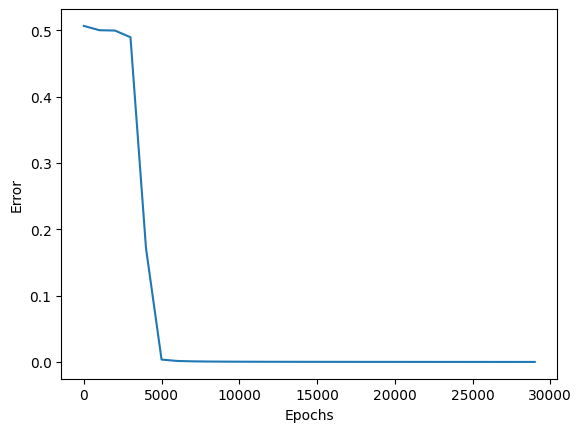

In [369]:
import matplotlib.pyplot as plt
plt.plot(range(0, epochs, 1000), errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()

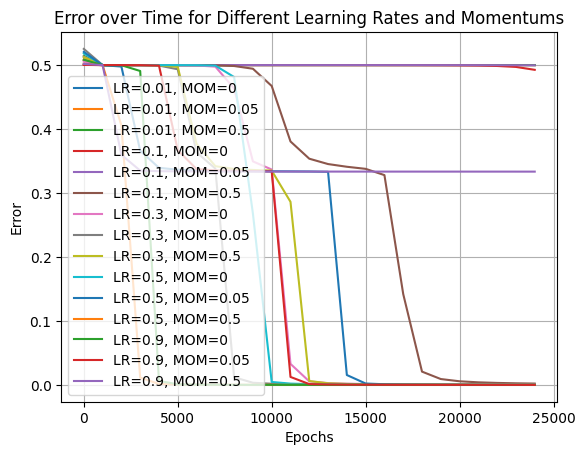

In [374]:
learning_rates = [0.01, 0.1, 0.3, 0.5, 0.9]
momentums = [0, 0.05, 0.5]
epochs = 25000
interval = 1000
errors = []

for lr in learning_rates:
    for momentum in momentums:
        network = Network(layer_specs=[4, 4, 1], input_dimensions=2, learning_rate=lr, momentum=momentum)
        data = [
            ([0, 0], 0),
            ([0, 1], 1),
            ([1, 0], 1),
            ([1, 1], 0),
        ]
        error_history = []
        for epoch in range(epochs):
            for x, y in data:
                network.update(x, [y])
            if epoch % interval == 0:
                error_history.append(calculate_error_single_classification(network, data))
        errors.append(error_history)

x_axis = list(range(0, epochs, interval))
index = 0

for lr in learning_rates:
    for momentum in momentums:
        plt.plot(x_axis, errors[index], label=f"LR={lr}, MOM={momentum}")
        index += 1
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error over Time for Different Learning Rates and Momentums")
plt.legend()
plt.grid(True)
plt.show()

Starting learning rate comparison for adder problem...
Epochs per LR: 3000, Logging error every 200 epochs.

Training with Learning Rate: 0.2
Finished training with LR=0.2. Final SSE: 0.0418

Training with Learning Rate: 0.3
Finished training with LR=0.3. Final SSE: 0.0186

Training with Learning Rate: 0.5
Finished training with LR=0.5. Final SSE: 0.5074

Training with Learning Rate: 0.8
Finished training with LR=0.8. Final SSE: 0.5053

Training with Learning Rate: 0.9
Finished training with LR=0.9. Final SSE: 0.5064


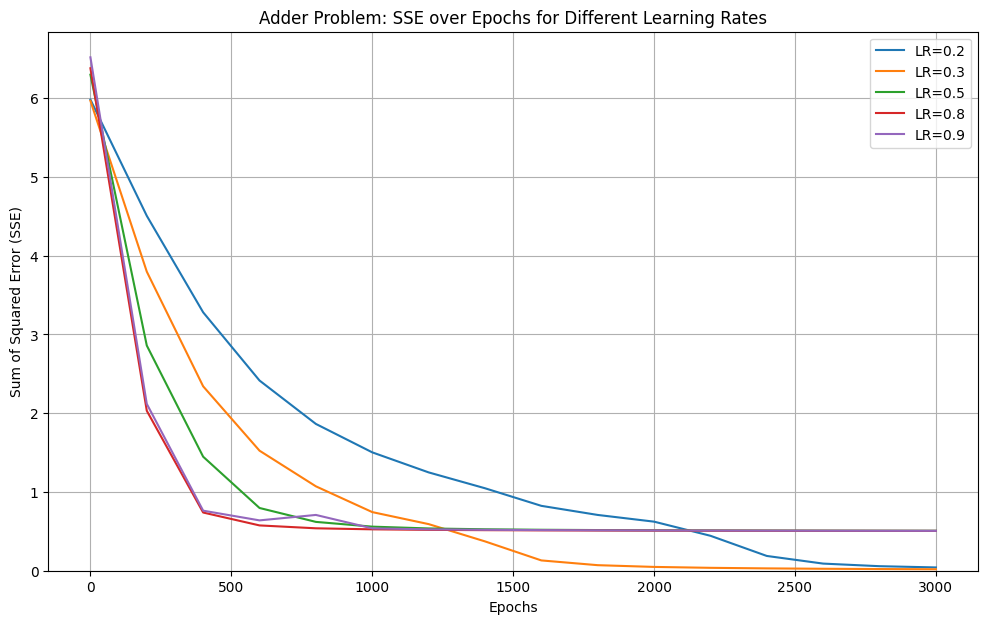


Final SSEs per Learning Rate:
LR=0.2: Final SSE = 0.0418
LR=0.3: Final SSE = 0.0186
LR=0.5: Final SSE = 0.5074
LR=0.8: Final SSE = 0.5053
LR=0.9: Final SSE = 0.5064


In [363]:
# testing the adding problem from their paper

data_adder = [
    ([0,0,0,0], [0,0,0]),
    ([0,0,0,1], [0,0,1]),
    ([0,0,1,0], [0,1,0]),
    ([0,0,1,1], [0,1,1]),
    ([0,1,0,0], [0,0,1]),
    ([0,1,0,1], [0,1,0]),
    ([0,1,1,0], [0,1,1]),
    ([0,1,1,1], [1,0,0]),
    ([1,0,0,0], [0,1,0]),
    ([1,0,0,1], [0,1,1]),
    ([1,0,1,0], [1,0,0]),
    ([1,0,1,1], [1,0,1]),
    ([1,1,0,0], [0,1,1]),
    ([1,1,0,1], [1,0,0]),
    ([1,1,1,0], [1,0,1]),
    ([1,1,1,1], [1,1,0])
]

input_dim_adder = 4
layer_specs_adder = [12, 12, 3]

def calculate_sse_multi(net, dataset):
    sse = 0.0
    for x_sample, y_true_list in dataset:
        y_pred_list = net.forward(x_sample)
        for i in range(len(y_true_list)):
            sse += (y_true_list[i] - y_pred_list[i]) ** 2
    return sse * 0.5

learning_rates_to_test = [0.2, 0.5, 0.9]
num_epochs_adder = 3000
log_interval = 200

all_error_histories = []

for lr in learning_rates_to_test:
    print(f"\nTraining with Learning Rate: {lr}")
    network_adder_instance = Network(layer_specs=layer_specs_adder,
                                     input_dimensions=input_dim_adder,
                                     learning_rate=lr)
    
    current_lr_error_history = []
    
    for epoch in range(num_epochs_adder):
        for x_input, y_target in data_adder:
            network_adder_instance.update(x_input, y_target)
        
        if epoch % log_interval == 0 or epoch == num_epochs_adder - 1:
            current_sse = calculate_sse_multi(network_adder_instance, data_adder)
            current_lr_error_history.append(current_sse)
    all_error_histories.append(current_lr_error_history)
    print(f"Finished training with LR={lr}. Final SSE: {current_lr_error_history[-1]:.4f}")

x_axis_epochs = list(range(0, num_epochs_adder + log_interval, log_interval))
if len(x_axis_epochs) > len(all_error_histories[0]):
    x_axis_epochs = x_axis_epochs[:len(all_error_histories[0])]

plt.figure(figsize=(12, 7))
for i, lr in enumerate(learning_rates_to_test):
    plt.plot(x_axis_epochs, all_error_histories[i], label=f"LR={lr}")

plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Error (SSE)")
plt.title("Adder Problem: SSE over Epochs for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

print("\nFinal SSEs per Learning Rate:")
for i, lr in enumerate(learning_rates_to_test):
    print(f"LR={lr}: Final SSE = {all_error_histories[i][-1]:.4f}")


Training with LR=0.2, Momentum=0
Finished training with LR=0.2, Momentum=0. Final SSE: 0.0409

Training with LR=0.3, Momentum=0
Finished training with LR=0.3, Momentum=0. Final SSE: 0.0190

Training with LR=0.5, Momentum=0
Finished training with LR=0.5, Momentum=0. Final SSE: 0.0051

Training with LR=0.9, Momentum=0
Finished training with LR=0.9, Momentum=0. Final SSE: 0.5043

Training with LR=0.2, Momentum=0.05
Finished training with LR=0.2, Momentum=0.05. Final SSE: 0.0387

Training with LR=0.3, Momentum=0.05
Finished training with LR=0.3, Momentum=0.05. Final SSE: 0.5255

Training with LR=0.5, Momentum=0.05
Finished training with LR=0.5, Momentum=0.05. Final SSE: 0.0075

Training with LR=0.9, Momentum=0.05
Finished training with LR=0.9, Momentum=0.05. Final SSE: 0.0035

Training with LR=0.2, Momentum=0.5
Finished training with LR=0.2, Momentum=0.5. Final SSE: 0.5428

Training with LR=0.3, Momentum=0.5
Finished training with LR=0.3, Momentum=0.5. Final SSE: 0.5791

Training with LR=

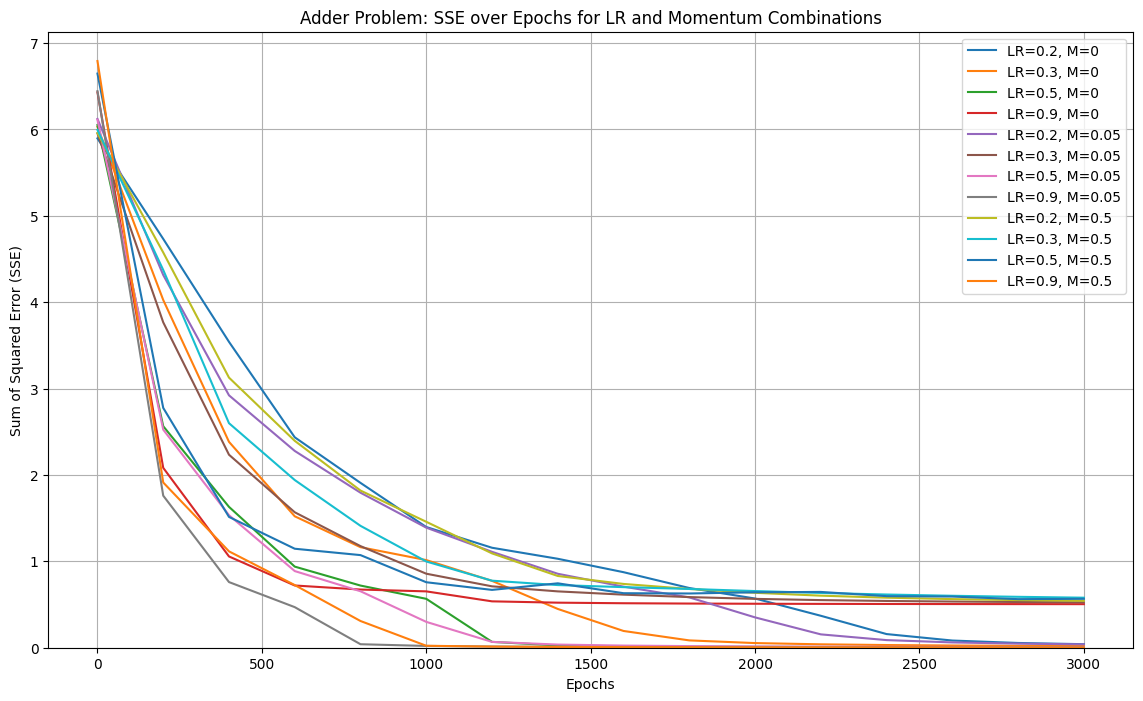


Final SSEs per (Learning Rate, Momentum):
LR=0.2, M=0: Final SSE = 0.0409
LR=0.3, M=0: Final SSE = 0.0190
LR=0.5, M=0: Final SSE = 0.0051
LR=0.9, M=0: Final SSE = 0.5043
LR=0.2, M=0.05: Final SSE = 0.0387
LR=0.3, M=0.05: Final SSE = 0.5255
LR=0.5, M=0.05: Final SSE = 0.0075
LR=0.9, M=0.05: Final SSE = 0.0035
LR=0.2, M=0.5: Final SSE = 0.5428
LR=0.3, M=0.5: Final SSE = 0.5791
LR=0.5, M=0.5: Final SSE = 0.5660
LR=0.9, M=0.5: Final SSE = 0.0026


In [375]:
import matplotlib.pyplot as plt

momentum_values = [0, 0.05, 0.5]
learning_rates_to_test = [0.2, 0.3, 0.5, 0.9]
num_epochs_adder = 3000
log_interval = 200

data_adder = [
    ([0,0,0,0], [0,0,0]), ([0,0,0,1], [0,0,1]), ([0,0,1,0], [0,1,0]), ([0,0,1,1], [0,1,1]),
    ([0,1,0,0], [0,0,1]), ([0,1,0,1], [0,1,0]), ([0,1,1,0], [0,1,1]), ([0,1,1,1], [1,0,0]),
    ([1,0,0,0], [0,1,0]), ([1,0,0,1], [0,1,1]), ([1,0,1,0], [1,0,0]), ([1,0,1,1], [1,0,1]),
    ([1,1,0,0], [0,1,1]), ([1,1,0,1], [1,0,0]), ([1,1,1,0], [1,0,1]), ([1,1,1,1], [1,1,0])
]

input_dim_adder = 4
layer_specs_adder = [12, 12, 3]

def calculate_sse_multi(net, dataset):
    sse = 0.0
    for x_sample, y_true_list in dataset:
        y_pred_list = net.forward(x_sample)
        for i in range(len(y_true_list)):
            sse += (y_true_list[i] - y_pred_list[i]) ** 2
    return sse * 0.5

results = {}

for momentum in momentum_values:
    for lr in learning_rates_to_test:
        print(f"\nTraining with LR={lr}, Momentum={momentum}")
        
        network_adder_instance = Network(
            layer_specs=layer_specs_adder,
            input_dimensions=input_dim_adder,
            learning_rate=lr,
            momentum=momentum
        )

        error_history = []
        
        for epoch in range(num_epochs_adder):
            for x_input, y_target in data_adder:
                network_adder_instance.update(x_input, y_target)
            
            if epoch % log_interval == 0 or epoch == num_epochs_adder - 1:
                current_sse = calculate_sse_multi(network_adder_instance, data_adder)
                error_history.append(current_sse)
        
        results[(lr, momentum)] = error_history
        print(f"Finished training with LR={lr}, Momentum={momentum}. Final SSE: {error_history[-1]:.4f}")

# Plotting
x_axis_epochs = list(range(0, num_epochs_adder + log_interval, log_interval))
if len(x_axis_epochs) > len(next(iter(results.values()))):
    x_axis_epochs = x_axis_epochs[:len(next(iter(results.values())))]

plt.figure(figsize=(14, 8))
for (lr, momentum), errors in results.items():
    plt.plot(x_axis_epochs, errors, label=f"LR={lr}, M={momentum}")

plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Error (SSE)")
plt.title("Adder Problem: SSE over Epochs for LR and Momentum Combinations")
plt.legend()
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

# Print final SSEs
print("\nFinal SSEs per (Learning Rate, Momentum):")
for (lr, momentum), errors in results.items():
    print(f"LR={lr}, M={momentum}: Final SSE = {errors[-1]:.4f}")


In [382]:
input_dim_adder = 4
layer_specs_adder = [12, 12, 3]
chosen_lr = 0.9
chosen_epochs = 1000

print(f"Training a network for evaluation with LR={chosen_lr} for {chosen_epochs} epochs...")
network_for_eval = Network(layer_specs=layer_specs_adder,
                           input_dimensions=input_dim_adder,
                           learning_rate=chosen_lr,
                            momentum=0.05
                          )

for epoch in range(chosen_epochs):
    for x_input, y_target in data_adder:
        network_for_eval.update(x_input, y_target)


print(f"\n--- Evaluation on Adder Problem ---")
total_samples = len(data_adder)
correct_predictions = 0

for x_sample, y_true_list in data_adder:
    output_raw_list = network_for_eval.forward(x_sample)
    predicted_bits = [1 if o > 0.5 else 0 for o in output_raw_list]
    is_sample_correct = (predicted_bits == y_true_list)
    
    if is_sample_correct:
        correct_predictions += 1
        
    status_color = "\033[92mCORRECT\033[0m" if is_sample_correct else "\033[91mWRONG\033[0m"
    
    print(f"Input: {x_sample}, Expected: {y_true_list}, Got_Bits: {predicted_bits} --> {status_color}")

accuracy = (correct_predictions / total_samples) * 100
print(f"\nOverall Accuracy: {accuracy:.2f}% ({correct_predictions}/{total_samples})")

Training a network for evaluation with LR=0.9 for 1000 epochs...

--- Evaluation on Adder Problem ---
Input: [0, 0, 0, 0], Expected: [0, 0, 0], Got_Bits: [0, 0, 0] --> CORRECT
Input: [0, 0, 0, 1], Expected: [0, 0, 1], Got_Bits: [0, 0, 1] --> CORRECT
Input: [0, 0, 1, 0], Expected: [0, 1, 0], Got_Bits: [0, 1, 0] --> CORRECT
Input: [0, 0, 1, 1], Expected: [0, 1, 1], Got_Bits: [0, 1, 1] --> CORRECT
Input: [0, 1, 0, 0], Expected: [0, 0, 1], Got_Bits: [0, 0, 1] --> CORRECT
Input: [0, 1, 0, 1], Expected: [0, 1, 0], Got_Bits: [0, 1, 0] --> CORRECT
Input: [0, 1, 1, 0], Expected: [0, 1, 1], Got_Bits: [0, 1, 1] --> CORRECT
Input: [0, 1, 1, 1], Expected: [1, 0, 0], Got_Bits: [1, 0, 0] --> CORRECT
Input: [1, 0, 0, 0], Expected: [0, 1, 0], Got_Bits: [0, 1, 0] --> CORRECT
Input: [1, 0, 0, 1], Expected: [0, 1, 1], Got_Bits: [0, 1, 1] --> CORRECT
Input: [1, 0, 1, 0], Expected: [1, 0, 0], Got_Bits: [1, 0, 0] --> CORRECT
Input: [1, 0, 1, 1], Expected: [1, 0, 1], Got_Bits: [1, 0, 1] --> CORRECT
Input: [1,